# IMPORTAR LAS LIBRERÍAS Y LOS DATASETS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Necesitarás montar tu disco usando los siguientes comandos:
# Para obtener más información sobre el montaje, consulta esto: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ENTRENAR Y EVALUAR UN CLASIFICADOR UTILIZANDO DEEP LEARNING

In [ ]:
senati_df = pd.read_csv("MOCK_DATA.csv")

In [ ]:
senati_df

,Prom_pondera,Porcentaje_asistencia,Autoevaluaciones,Curso_cargo,Sexo,Sede,Edad,Trabaja,Graduado
0,15,0.25,1,1,F,Lambayeque,27,Si,No
1,14,0.58,4,1,F,Chimbote,29,No,No
2,17,0.27,5,1,F,Arequipa,29,Si,No
3,14,0.30,14,1,M,Chimbote,28,No,No
4,19,0.55,15,1,M,Lambayeque,23,Si,Si
...,...,...,...,...,...,...,...,...,...
195,17,0.25,5,1,F,Loreto,29,Si,Si
196,19,0.87,1,1,F,Loreto,22,No,Si
197,16,0.29,2,1,F,Chimbote,18,Si,Si
198,20,0.52,12,1,M,Lambayeque,27,Si,Si


In [ ]:
senati_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Prom_pondera           200 non-null    int64  
 1   Porcentaje_asistencia  200 non-null    float64
 2   Autoevaluaciones       200 non-null    int64  
 3   Curso_cargo            200 non-null    int64  
 4   Sexo                   200 non-null    object 
 5   Sede                   200 non-null    object 
 6   Edad                   200 non-null    int64  
 7   Trabaja                200 non-null    object 
 8   Graduado               200 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 14.2+ KB


In [ ]:
#metodo map del label encoding
senati_df['Sexo'] = senati_df['Sexo'].map({"F": 0, "M": 1}).astype(int)
senati_df['Trabaja'] = senati_df["Trabaja"].map({"Si": 1, "No": 0}).astype(int)
senati_df['Graduado'] = senati_df["Graduado"].map({"Si": 1, "No": 0}).astype(int)


In [ ]:
senati_df

,Prom_pondera,Porcentaje_asistencia,Autoevaluaciones,Curso_cargo,Sexo,Sede,Edad,Trabaja,Graduado
0,15,0.25,1,1,0,Lambayeque,27,1,0
1,14,0.58,4,1,0,Chimbote,29,0,0
2,17,0.27,5,1,0,Arequipa,29,1,0
3,14,0.30,14,1,1,Chimbote,28,0,0
4,19,0.55,15,1,1,Lambayeque,23,1,1
...,...,...,...,...,...,...,...,...,...
195,17,0.25,5,1,0,Loreto,29,1,1
196,19,0.87,1,1,0,Loreto,22,0,1
197,16,0.29,2,1,0,Chimbote,18,1,1
198,20,0.52,12,1,1,Lambayeque,27,1,1


In [ ]:
X_cat_sede = senati_df[["Sede"]]
X_cat_sede

,Sede
0,Lambayeque
1,Chimbote
2,Arequipa
3,Chimbote
4,Lambayeque
...,...
195,Loreto
196,Loreto
197,Chimbote
198,Lambayeque


In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat_sede = onehotencoder.fit_transform(X_cat_sede).toarray()

X_cat_sede = pd.DataFrame(X_cat_sede)
X_cat_sede

,0,1,2,3,4
0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,1.0
196,0.0,0.0,0.0,0.0,1.0
197,0.0,1.0,0.0,0.0,0.0
198,0.0,0.0,1.0,0.0,0.0


In [ ]:
X_numerical = senati_df[["Prom_pondera","Porcentaje_asistencia","Autoevaluaciones","Curso_cargo","Sexo","Edad","Trabaja"]]
X_numerical


,Prom_pondera,Porcentaje_asistencia,Autoevaluaciones,Curso_cargo,Sexo,Edad,Trabaja
0,15,0.25,1,1,0,27,1
1,14,0.58,4,1,0,29,0
2,17,0.27,5,1,0,29,1
3,14,0.30,14,1,1,28,0
4,19,0.55,15,1,1,23,1
...,...,...,...,...,...,...,...
195,17,0.25,5,1,0,29,1
196,19,0.87,1,1,0,22,0
197,16,0.29,2,1,0,18,1
198,20,0.52,12,1,1,27,1


In [ ]:
X_all = pd.concat([X_cat_sede, X_numerical], axis = 1)
X_all

,0,1,2,3,4,Prom_pondera,Porcentaje_asistencia,Autoevaluaciones,Curso_cargo,Sexo,Edad,Trabaja
0,0.0,0.0,1.0,0.0,0.0,15,0.25,1,1,0,27,1
1,0.0,1.0,0.0,0.0,0.0,14,0.58,4,1,0,29,0
2,1.0,0.0,0.0,0.0,0.0,17,0.27,5,1,0,29,1
3,0.0,1.0,0.0,0.0,0.0,14,0.30,14,1,1,28,0
4,0.0,0.0,1.0,0.0,0.0,19,0.55,15,1,1,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,1.0,17,0.25,5,1,0,29,1
196,0.0,0.0,0.0,0.0,1.0,19,0.87,1,1,0,22,0
197,0.0,1.0,0.0,0.0,0.0,16,0.29,2,1,0,18,1
198,0.0,0.0,1.0,0.0,0.0,20,0.52,12,1,1,27,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)
X

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([[0.        , 0.        , 1.        , ..., 0.        , 0.76923077,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.92307692,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.92307692,
        1.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.        , 0.07692308,
        1.        ],
       [0.        , 0.        , 1.        , ..., 1.        , 0.76923077,
        1.        ],
       [0.        , 0.        , 1.        , ..., 1.        , 0.92307692,
        0.        ]])

In [ ]:
y = senati_df['Graduado']
y

0      0
1      0
2      0
3      0
4      1
      ..
195    1
196    1
197    1
198    1
199    1
Name: Graduado, Length: 200, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential() #Sequential() 1 de 2 
#.add para agregar 1 capa
model.add(tf.keras.layers.Dense(units = 500, activation='relu', input_shape=(12, ))) # Unit = neuronas
model.add(tf.keras.layers.Dense(units = 500, activation='relu')) # relu pasa de numeros negativos a 0
model.add(tf.keras.layers.Dense(units = 500, activation='relu'))
model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid')) # Unit = 1 ultima capa ,neurona de salida , (activation=sigmoid) = funcion de activacion

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 500)               6500      
                                                                 
 dense_17 (Dense)            (None, 500)               250500    
                                                                 
 dense_18 (Dense)            (None, 500)               250500    
                                                                 
 dense_19 (Dense)            (None, 1)                 501       
                                                                 
Total params: 508,001
Trainable params: 508,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
# oversampler = SMOTE(random_state=0)
# smote_train, smote_target = oversampler.fit_sample(X_train, y_train)
# epochs_hist = model.fit(smote_train, smote_target, epochs = 100, batch_size = 50)
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size=12)

Epoch 1/100
13/13 [==============================] - 1s 7ms/step - loss: 0.7018 - accuracy: 0.5333
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 0.6844 - accuracy: 0.5667
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 0.6476 - accuracy: 0.6333
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 0.6289 - accuracy: 0.6733
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 0.5925 - accuracy: 0.7067
Epoch 6/100
13/13 [==============================] - 0s 7ms/step - loss: 0.5572 - accuracy: 0.7267
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 0.5260 - accuracy: 0.7333
Epoch 8/100
13/13 [==============================] - 0s 7ms/step - loss: 0.4762 - accuracy: 0.8000
Epoch 9/100
13/13 [==============================] - 0s 8ms/step - loss: 0.4214 - accuracy: 0.7933
Epoch 10/100
13/13 [==============================] - 0s 8ms/step - loss: 0.4533 - accuracy: 0.7733
Epoch 11/

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[9.9997509e-01],
       [1.0238290e-03],
       [5.9842163e-01],
       [1.9910322e-09],
       [9.9999815e-01],
       [2.9433462e-09],
       [1.0000000e+00],
       [3.8735777e-02],
       [9.9983710e-01],
       [1.4678550e-08],
       [4.0739775e-04],
       [6.8196118e-02],
       [9.9975759e-01],
       [1.1909261e-01],
       [9.8727500e-01],
       [3.3576328e-09],
       [9.6005219e-01],
       [9.9982190e-01],
       [9.9997789e-01],
       [7.4482505e-06],
       [9.3389803e-01],
       [9.8196876e-01],
       [9.9999225e-01],
       [1.5944686e-09],
       [9.9988616e-01],
       [1.0126066e-01],
       [3.9220113e-06],
       [4.6954227e-09],
       [1.0000000e+00],
       [1.1322235e-08],
       [8.6293131e-01],
       [1.4212031e-05],
       [9.9711847e-01],
       [3.2201409e-04],
       [1.2065510e-06],
       [9.9999756e-01],
       [8.7082307e-11],
       [3.1111292e-06],
       [2.9513836e-03],
       [8.3016318e-01],
       [1.0337902e-11],
       [9.038448

In [ ]:
y_pred = (y_pred > 0.5)
y_pred

array([[ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False]])

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

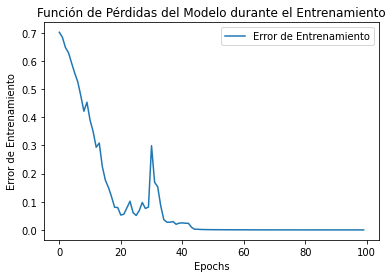

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title("Función de Pérdidas del Modelo durante el Entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("Error de Entrenamiento")
plt.legend(["Error de Entrenamiento"])

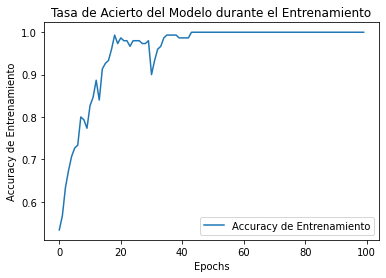

In [ ]:
plt.plot(epochs_hist.history['accuracy'])
plt.title("Tasa de Acierto del Modelo durante el Entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("Accuracy de Entrenamiento")
plt.legend(["Accuracy de Entrenamiento"])

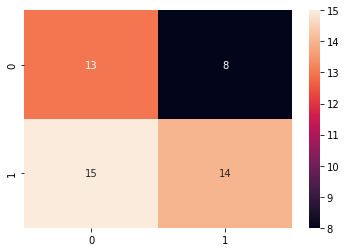

In [ ]:
# Resultados en el Conjunto de Testing
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.62      0.53        21
           1       0.64      0.48      0.55        29

    accuracy                           0.54        50
   macro avg       0.55      0.55      0.54        50
weighted avg       0.56      0.54      0.54        50



# ¡EXCELENTE TRABAJO! PUEDES ESTAR ORGULLOSO DE TUS HABILIDADES RECIEN ADQUIRIDAS